## Задача 3


Вычислить сумму ряда
$$
\sum_{n=1}^{\infty} \frac{n^2+1}{n^4+n^2+1} \operatorname{сos}(2 n)
$$

с точностью $\varepsilon=10^{-6}$, применяя метод Куммера.

Определим количество членов, необходимое для обеспечения требуемой точности $\varepsilon=10^{-6}$.
$$
\begin{aligned}
& \left|R_k\right|=\sum_{n=k+1}^{\infty}\left|\frac{n^2+1}{n^4+n^2+1} \operatorname{Cos}(2 n)\right| \leq \sum_{n=k+1}^{\infty} \frac{n^2+1}{n^4+n^2+1}<\sum_{n=k+1}^{\infty} \frac{n^2+1}{n^2\left(n^2+1\right)}=\sum_{n=k+1}^{\infty} \frac{1}{n^2}< \\
& <\int_{k+1}^{\infty} \frac{d x}{x^2}=\frac{1}{k+1}<10^{-6}
\end{aligned}
$$

Следовательно
$$
\mathrm{k}+1>10^{-6}, \quad \mathrm{k}>10^{-6}-1 .
$$



Теперь воспользуемся вспомогательным рядом из таблицы
$$
\sum_{n=1}^{\infty} \frac{\operatorname{cos}(n x)}{n^2}=\frac{\pi^2}{6}-\frac{\pi x}{12}+\frac{x^2}{4} \text { при } \mathrm{x}=2
$$

имеем
$$
\sum_{n=1}^{\infty} \frac{\operatorname{cos}(2 n)}{n^2}=\frac{\pi^2}{6}-\frac{\pi}{6}+1 .
$$

Находим
$$
\gamma=\lim _{n \rightarrow \infty} \frac{a_n}{b_n}=\lim _{n \rightarrow \infty} \frac{\left(n^2+1\right) \operatorname{cos} 2 n \cdot n^2}{\left(n^4+n^2+1\right) \cdot \operatorname{cos} 2 n}=1
$$

Отсюда
$$
\begin{aligned}
& S=\sum_{n=1}^{\infty} \frac{n^2}{n^4+n^2+1} \cdot \operatorname{cos} 2 n=\frac{\pi^2}{6}-\frac{\pi}{6}+1+\sum_{n=1}^{\infty}\left(\frac{n^2}{n^4+n^2+1}-\frac{1}{n^2}\right) \cdot \operatorname{cos} 2 n= \\
& =\frac{\pi^2}{6}-\frac{\pi}{6}+1-\sum_{n=1}^{\infty} \frac{\operatorname{cos} 2 n}{n^2\left(n^4+n^2+1\right)} .
\end{aligned}
$$

Определим количество членов полученного ряда, необходимое для обеспечения точности $\varepsilon$.
$$
\left|R_k\right|=\left|\sum_{x=k+1}^{\infty} \frac{\operatorname{cos} 2 n}{n^2\left(n^4+n^2+1\right)}\right| \leq \sum_{n=k+1}^{\infty} \frac{1}{n^2\left(n^4+n^2+1\right)}<=\sum_{n=k+1}^{\infty} \frac{1}{n^6}<\int_{k+1}^{\infty} \frac{d x}{x^6}=\frac{1}{5(k+1)^5}<10^{-6} .
$$

Откуда находим, что искомая точность достигается при $\mathrm{k} \geq 10$ слагаемых.

In [5]:
def kummer(k):
    """Вычисление ряда (n^2 + 1) * cos(..) методом Куммера

    Args:
        k (_type_): _description_

    Returns:
        _type_: _description_
    """
    n = np.arange(k) + 1
    sum_part = np.sum(1 /((n**2) * (n**4 + n**2 + 1)) * np.cos(2 * n))
    return np.pi**2 / 6 - np.pi / 6 + 1 - sum_part
print(kummer(20))

2.2667284926401114


## Задача 4

In [8]:
import numpy as np
import matplotlib.pyplot as plt

[-0.0075 -0.0065 -0.0055 -0.0045 -0.0035 -0.0025 -0.0015 -0.0005  0.0005
  0.0015  0.0025  0.0035  0.0045  0.0055  0.0065  0.0075  0.0085  0.0095]


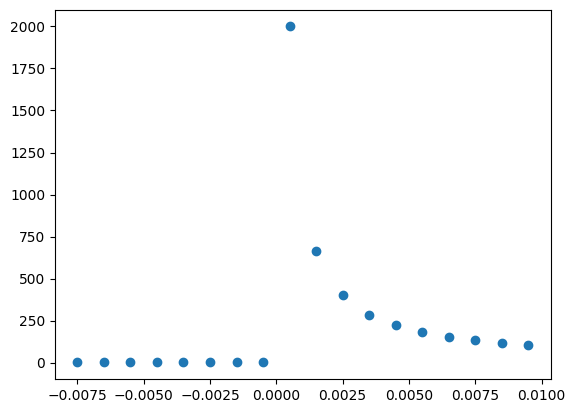

In [21]:
def y(x):
    return np.cosh(np.sqrt(np.abs(x))) * (x > 0) + np.cos(np.sqrt(np.abs(x)))
f = lambda x: (y(x) - 1) / x

x_grid = np.arange(-0.75 * 1e-2, 1e-2, 1e-3)
print(x_grid)
plt.scatter(x_grid, f(x_grid))

In [26]:
from scipy.special import comb, factorial

In [27]:
def A(k, n, m):
    global D
    r = 0 
    for l in range(m+1):
        r+=(-1)**(k-m)*D[n][l]*comb(n+2*l,k-m+l)
    return r

D = [[None for i in range(70)] for k in range(70)]

for n in range(30):
    for j in range(30):
        if j==0:
            D[n][j] = 1
        else:
            ji = j-1
            ret = 0
            for k in range(n + 2*ji  + 1):
                for l in range(ji + 1):
                    ret += (-1)**k * D[n][l] * comb(n + 2*l, k - ji + l) * (n  + 2*ji - 2*k)**(n+2*ji + 2) / (2**(n + 2*ji + 2) * factorial(n + 2*ji + 2))
            D[n][j] = ret

In [36]:
N = 10
m = 23
dx = 1e-5
res1 = 0
def f1(x):
    return (np.cosh(np.sqrt(np.abs(x))) - 1) / x
def y1(j):
    if j>0:
        return f1((j*2-1)/2*dx)
    return f1(dx/2*(2*k+1))
for n in range(N+1):
    for k in range(2*m + n % 2 +1 ):
        res1+= A(k, n, int(m -(n - (n%2))/2))*(-1)**n/(4**n*factorial(n))* y1(2*m + n%2-2*k)
print(f"Правоcторонний предел: {res1:.2f}")      


Правоcторонний предел: 0.50
